In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

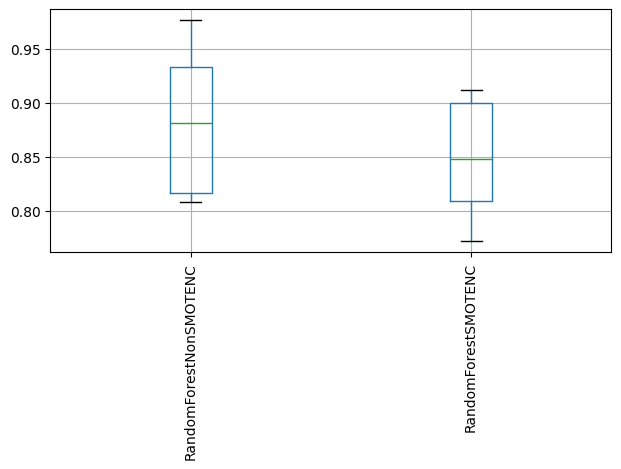

In [2]:
cv_scores = {
    'RandomForestNonSMOTENC': np.load("results/RandomForestNonSMOTENC.npy"),
    'RandomForestSMOTENC': np.load("results/RandomForestSMOTENC.npy"),
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.savefig("stat_result(RFComparison).png")
plt.show()

C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


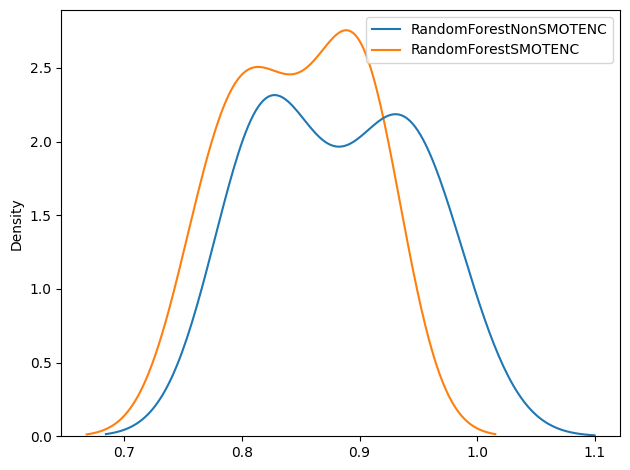

In [3]:
import scipy.stats as stats

sns.kdeplot(data=df_cv_scores)
plt.tight_layout()
plt.savefig("RFComparison KDE plot.png")
plt.show()

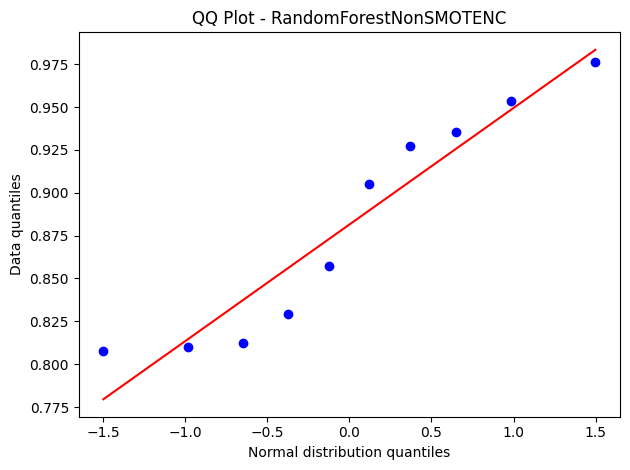

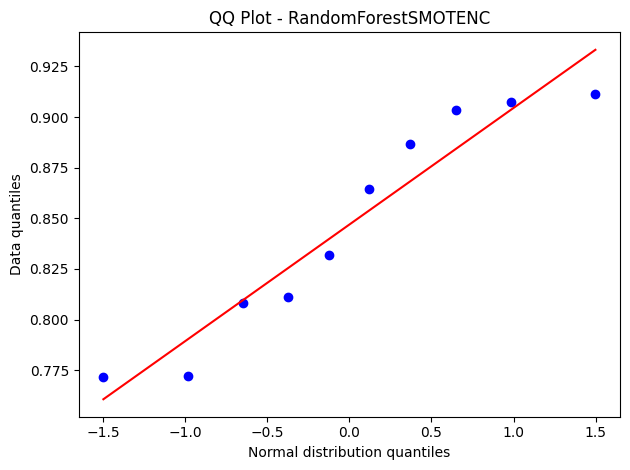

In [4]:
for i, col in enumerate(df_cv_scores.columns):
    stats.probplot(df_cv_scores[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()
    plt.savefig(f"RFComparison_Test_QQ_Plot_{col}.png")

    plt.show()

In [5]:
statistic, p_value = stats.levene(cv_scores["RandomForestNonSMOTENC"], 
                                 cv_scores["RandomForestSMOTENC"])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances (homoscedasticity).")
else:
    print("There is no evidence to reject the null hypothesis of equal variances (homoscedasticity).")

Levene's statistic: 1.062692408573006
p value: 0.3162553591524611
There is no evidence to reject the null hypothesis of equal variances (homoscedasticity).


In [6]:
from itertools import combinations
from scipy.stats import ks_2samp

ks_2samp_result = ks_2samp(cv_scores["RandomForestNonSMOTENC"], 
                        cv_scores["RandomForestSMOTENC"])

print("KS statistic:", ks_2samp_result.statistic)
print("p value:", ks_2samp_result.pvalue)

if ks_2samp_result.pvalue < 0.05:
    print("There is a statistically relevant difference.")
else:
    print("There is no statistically relevant difference.")

KS statistic: 0.4
p value: 0.41752365281777043
There is no statistically relevant difference.


In [8]:
from scipy.stats import wilcoxon

wilcoxon_result = wilcoxon(cv_scores["RandomForestNonSMOTENC"], 
                        cv_scores["RandomForestSMOTENC"])

print("Wilcoxon statistic:", wilcoxon_result.statistic)
print("p value:", wilcoxon_result.pvalue)

if wilcoxon_result.pvalue < 0.05:
    print("There is a statistically relevant difference.")
else:
    print("There is no statistically relevant difference.")

Wilcoxon statistic: 7.0
p value: 0.037109375
There is a statistically relevant difference.
